![Projetos de Eficiência Energética](https://www.eletronenergia.com.br/wp-content/uploads/2017/08/Projetos-de-eficiencia-energetica-para-condominios-Residenciais.jpg)

# Dataset: Energy Efficiency Data Set

Utilizaremos o dataset **"Energy Efficiency Data Set"** disponível no Kaggle.

- **Link para o dataset**: [Energy Efficiency Data Set - Kaggle](https://www.kaggle.com/datasets/halilbrahimhatun/enb2012-data)

Este dataset contém dados sobre diversas edificações, incluindo características arquitetônicas e os respectivos consumos de energia para aquecimento e resfriamento.


# Descrição das Variáveis

### Variáveis de Entrada (Features)
- **Área_Relativa_Compacta**: Razão entre a área de superfície envolvente da edificação e o seu volume.
- **Área_Superfície**: Área total das superfícies externas da edificação.
- **Área_Parede**: Área total das paredes externas da edificação.
- **Área_Telhado**: Área total do telhado da edificação.
- **Altura_Total**: Altura total da edificação.
- **Orientação**: Direção cardinal da fachada principal (valores de 2 a 5).
- **Área_Envidraçada**: Proporção da área envidraçada em relação à área total da fachada (0 a 0.4).
- **Distribuição_Envidraçada**: Distribuição da área envidraçada nas orientações (valores de 0 a 5).

### Variáveis Alvo (Targets)
- **Carga_Aquecimento**: Carga térmica necessária para aquecer a edificação (kWh/m²).
- **Carga_Resfriamento**: Carga térmica necessária para resfriar a edificação (kWh/m²).
# Configuração do Ambiente e Importação das Bibliotecas


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dados = pd.read_excel('dados.xlsx') # Importando os dados
dados.columns = ['Área_Relativa_Compacta', 'Área_Superfície', 'Área_Parede', 'Área_Telhado',
                 'Altura_Total', 'Orientação', 'Área_Envidraçada', 'Distribuição_Envidraçada',
                 'Carga_Aquecimento', 'Carga_Resfriamento']

display(dados)
dados.info()

,Área_Relativa_Compacta,Área_Superfície,Área_Parede,Área_Telhado,Altura_Total,Orientação,Área_Envidraçada,Distribuição_Envidraçada,Carga_Aquecimento,Carga_Resfriamento
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Área_Relativa_Compacta    768 non-null    float64
 1   Área_Superfície           768 non-null    float64
 2   Área_Parede               768 non-null    float64
 3   Área_Telhado              768 non-null    float64
 4   Altura_Total              768 non-null    float64
 5   Orientação                768 non-null    int64  
 6   Área_Envidraçada          768 non-null    float64
 7   Distribuição_Envidraçada  768 non-null    int64  
 8   Carga_Aquecimento         768 non-null    float64
 9   Carga_Resfriamento        768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


# Análise Exploratória de Dados
### Estatísticas descritivas

In [3]:
dados.describe()

,Área_Relativa_Compacta,Área_Superfície,Área_Parede,Área_Telhado,Altura_Total,Orientação,Área_Envidraçada,Distribuição_Envidraçada,Carga_Aquecimento,Carga_Resfriamento
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


### Verificação de Valores Nulos

In [4]:
dados.isnull().sum()

Área_Relativa_Compacta      0
Área_Superfície             0
Área_Parede                 0
Área_Telhado                0
Altura_Total                0
Orientação                  0
Área_Envidraçada            0
Distribuição_Envidraçada    0
Carga_Aquecimento           0
Carga_Resfriamento          0
dtype: int64

### Matriz de Correlação

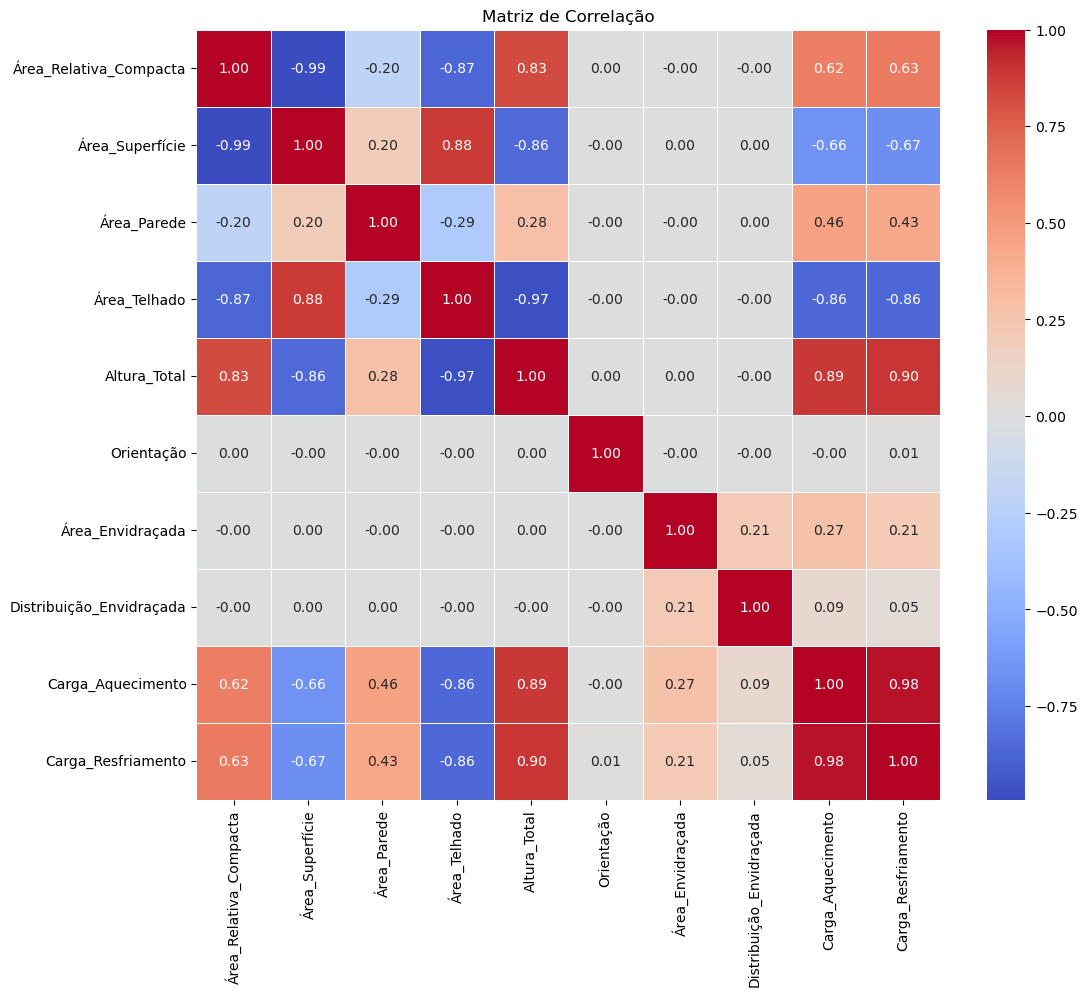

In [5]:
corr_matrix = dados.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

### Distribuição das Variáveis Alvo (Carga_Aquecimento e Carga_Resfriamento)

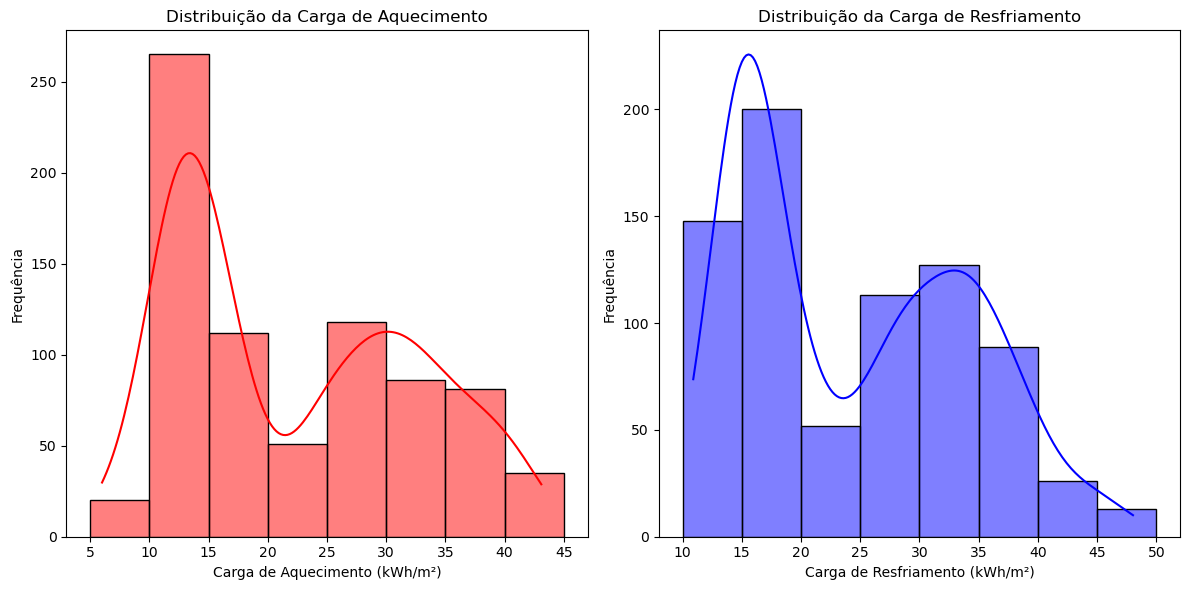

In [6]:
plt.figure(figsize=(12, 6))

max_valor = dados["Carga_Aquecimento"].max()
bins = np.arange(start=5, stop=max_valor + 5, step=5)

# Distribuição da Carga de Aquecimento
plt.subplot(1, 2, 1)
sns.histplot(dados["Carga_Aquecimento"], bins=bins, kde=True, color="red")
plt.title("Distribuição da Carga de Aquecimento")
plt.xlabel("Carga de Aquecimento (kWh/m²)")
plt.ylabel("Frequência")

max_valor = dados["Carga_Resfriamento"].max()
bins = np.arange(start=10, stop=max_valor + 5, step=5)

# Distribuição da Carga de Resfriamento
plt.subplot(1, 2, 2)
sns.histplot(dados["Carga_Resfriamento"], bins=bins, kde=True, color="blue")
plt.title("Distribuição da Carga de Resfriamento")
plt.xlabel("Carga de Resfriamento (kWh/m²)")
plt.ylabel("Frequência")

plt.tight_layout()
plt.show()

# Pré-processamento dos Dados
### One-Hot Encoding
Transforma categorias em colunas binárias, permitindo que o modelo interprete corretamente informações qualitativas.

In [7]:
# Verificando os valores únicos das variáveis categóricas
print("Valores únicos em Orientação:", dados["Orientação"].unique())
print(
    "Valores únicos em Distribuição_Envidraçada:",
    dados["Distribuição_Envidraçada"].unique(),
)

# Aplicando one-hot encoding nas variáveis categóricas
dados = pd.get_dummies(dados, columns=["Orientação", "Distribuição_Envidraçada"])

dados.head()

Valores únicos em Orientação: [2 3 4 5]
Valores únicos em Distribuição_Envidraçada: [0 1 2 3 4 5]


,Área_Relativa_Compacta,Área_Superfície,Área_Parede,Área_Telhado,Altura_Total,Área_Envidraçada,Carga_Aquecimento,Carga_Resfriamento,Orientação_2,Orientação_3,Orientação_4,Orientação_5,Distribuição_Envidraçada_0,Distribuição_Envidraçada_1,Distribuição_Envidraçada_2,Distribuição_Envidraçada_3,Distribuição_Envidraçada_4,Distribuição_Envidraçada_5
0,0.98,514.5,294.0,110.25,7.0,0.0,15.55,21.33,True,False,False,False,True,False,False,False,False,False
1,0.98,514.5,294.0,110.25,7.0,0.0,15.55,21.33,False,True,False,False,True,False,False,False,False,False
2,0.98,514.5,294.0,110.25,7.0,0.0,15.55,21.33,False,False,True,False,True,False,False,False,False,False
3,0.98,514.5,294.0,110.25,7.0,0.0,15.55,21.33,False,False,False,True,True,False,False,False,False,False
4,0.90,563.5,318.5,122.50,7.0,0.0,20.84,28.28,True,False,False,False,True,False,False,False,False,False


### Normalização das Features
Ajusta a escala das variáveis numéricas para um mesmo intervalo, evitando que variáveis com valores muito altos influenciem desproporcionalmente o modelo.

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Definindo as features (X) e a variável alvo (y)
X = dados.drop(["Carga_Aquecimento", "Carga_Resfriamento"], axis=1)
y_aq = dados["Carga_Aquecimento"]
y_res = dados["Carga_Resfriamento"]

# Aplicando a normalização
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convertendo de volta para DataFrame
X = pd.DataFrame(X_scaled, columns=X.columns)

X.head()

,Área_Relativa_Compacta,Área_Superfície,Área_Parede,Área_Telhado,Altura_Total,Área_Envidraçada,Orientação_2,Orientação_3,Orientação_4,Orientação_5,Distribuição_Envidraçada_0,Distribuição_Envidraçada_1,Distribuição_Envidraçada_2,Distribuição_Envidraçada_3,Distribuição_Envidraçada_4,Distribuição_Envidraçada_5
0,1.000000,0.000000,0.285714,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.000000,0.285714,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.000000,0.285714,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.000000,0.285714,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.777778,0.166667,0.428571,0.111111,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Construindo o Modelo de Inteligência Artificial
### Divisão dos Dados em Treinamento e Teste

In [9]:
from sklearn.model_selection import train_test_split

seed = 60

# Divisão de dados para Carga de Aquecimento
X_treino_aq, X_teste_aq, y_treino_aq, y_teste_aq = train_test_split(
    X, y_aq, test_size=0.2, random_state=seed
)

# Divisão de dados para Carga de Resfriamento
X_treino_res, X_teste_res, y_treino_res, y_teste_res = train_test_split(
    X, y_res, test_size=0.2, random_state=seed
)

X_treino_aq.shape, X_teste_aq.shape, y_treino_aq.shape, y_teste_aq.shape, X_treino_res.shape, X_teste_res.shape, y_treino_res.shape, y_teste_res.shape

((614, 16), (154, 16), (614,), (154,), (614, 16), (154, 16), (614,), (154,))

### Random Forest Regressor
O Random Forest Regressor é um algoritmo de aprendizado de máquina utilizado para tarefas de regressão e classificação. Ele funciona construindo múltiplas árvores de decisão durante o treinamento e produzindo a média das previsões individuais de cada árvore.

![Random Forest Diagram](https://www.ibm.com/content/dam/connectedassets-adobe-cms/worldwide-content/cdp/cf/ul/g/50/f9/ICLH_Diagram_Batch_03_27-RandomForest.component.simple-narrative-xl.ts=1727882209096.png/content/adobe-cms/br/pt/topics/random-forest/jcr:content/root/table_of_contents/body/content_section_styled/content-section-body/simple_narrative0/image)


In [10]:
from sklearn.ensemble import RandomForestRegressor

# Criando o modelo
modelo_aq = RandomForestRegressor(n_estimators=100, random_state=seed)
modelo_res = RandomForestRegressor(n_estimators=100, random_state=seed)

# Treinando o modelo
modelo_aq.fit(X_treino_aq, y_treino_aq)
modelo_res.fit(X_treino_res, y_treino_res)

# Realizando predições no conjunto de teste
y_pred_aq = modelo_aq.predict(X_teste_aq)
y_pred_res = modelo_res.predict(X_teste_res)


# Avaliação do Modelo
### Métricas

##### Mean Absolute Error (MAE)
- Indica o erro médio absoluto entre as previsões e os valores reais.  

##### Mean Squared Error (MSE)
- Eleva ao quadrado as diferenças entre valores reais e previstos, enfatizando erros maiores.

##### Root Mean Squared Error (RMSE)
- É a raiz quadrada do MSE, trazendo o erro de volta à mesma unidade da variável alvo.

##### R² (Coeficiente de Determinação)
- Mede a proporção da variabilidade dos dados que o modelo consegue explicar.


In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Avaliação do modelo para Carga de Aquecimento
mae_aq = mean_absolute_error(y_teste_aq, y_pred_aq)
mse_aq = mean_squared_error(y_teste_aq, y_pred_aq)
rmse_aq = np.sqrt(mse_aq)
r2_aq = r2_score(y_teste_aq, y_pred_aq)

print("Avaliação - Carga de Aquecimento")
print(f"MAE: {mae_aq}")
print(f"MSE: {mse_aq}")
print(f"RMSE: {rmse_aq}")
print(f"R²: {r2_aq}")

# Avaliação do modelo para Carga de Resfriamento
mae_res = mean_absolute_error(y_teste_res, y_pred_res)
mse_res = mean_squared_error(y_teste_res, y_pred_res)
rmse_res = np.sqrt(mse_res)
r2_res = r2_score(y_teste_res, y_pred_res)

print("\nAvaliação - Carga de Resfriamento")
print(f"MAE: {mae_res}")
print(f"MSE: {mse_res}")
print(f"RMSE: {rmse_res}")
print(f"R²: {r2_res}")

Avaliação - Carga de Aquecimento
MAE: 0.3749962337662335
MSE: 0.33075078353506365
RMSE: 0.5751093665860987
R²: 0.9965814573428909

Avaliação - Carga de Resfriamento
MAE: 1.2468162337662343
MSE: 3.929232040194822
RMSE: 1.982229058457882
R²: 0.9551418286453635


- O modelo para Carga de Aquecimento apresenta desempenho superior, com erros baixos e um $R^2$ muito alto.
- O modelo para Carga de Resfriamento ainda tem um desempenho bom, mas os erros são mais altos e $R^2$ inferior.
- A diferença de desempenho pode ser explicada por características intrínsecas dos dados, como maior complexidade na relação entre as variáveis e a Carga de Resfriamento.
### Valores reais vs. preditos

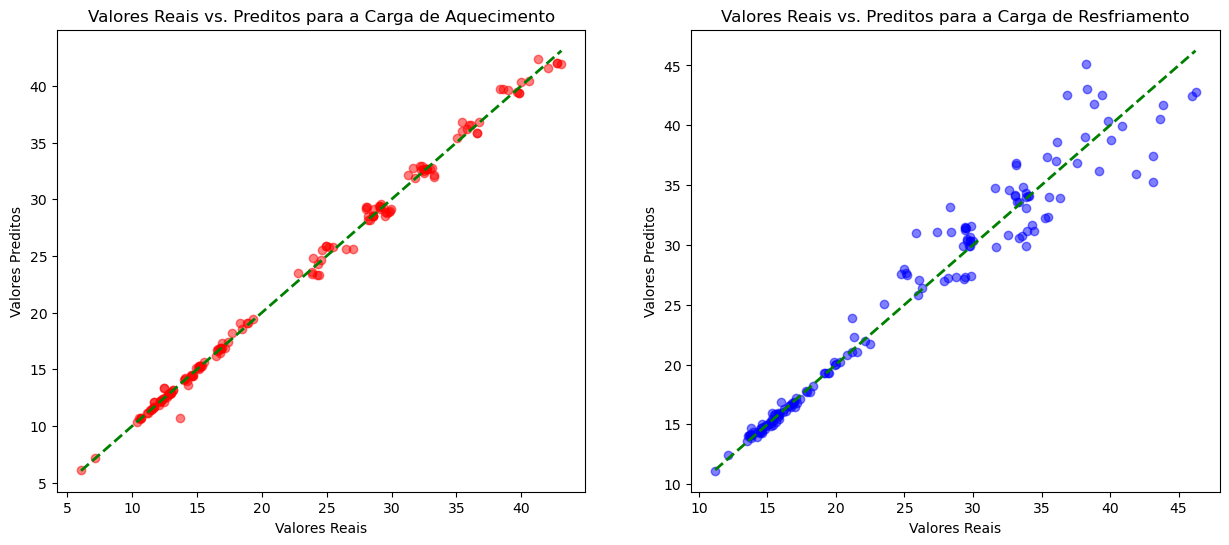

In [12]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_teste_aq, y_pred_aq, color='red', alpha=0.5)
plt.plot([min(y_teste_aq), max(y_teste_aq)], [min(y_teste_aq), max(y_teste_aq)], color='green', lw=2, linestyle='--')
plt.title('Valores Reais vs. Preditos para a Carga de Aquecimento')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')

plt.subplot(1, 2, 2)
plt.scatter(y_teste_res, y_pred_res, color='blue', alpha=0.5)
plt.plot([min(y_teste_res), max(y_teste_res)], [min(y_teste_res), max(y_teste_res)], color='green', lw=2, linestyle='--')
plt.title('Valores Reais vs. Preditos para a Carga de Resfriamento')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')

plt.show()

- Os pontos se alinham bem à linha verde, indicando previsões próximas dos valores reais.
- Baixa dispersão sugere bom desempenho do modelo em ambas as Cargas, principalmente a de Aquecimento.

### Importância das features

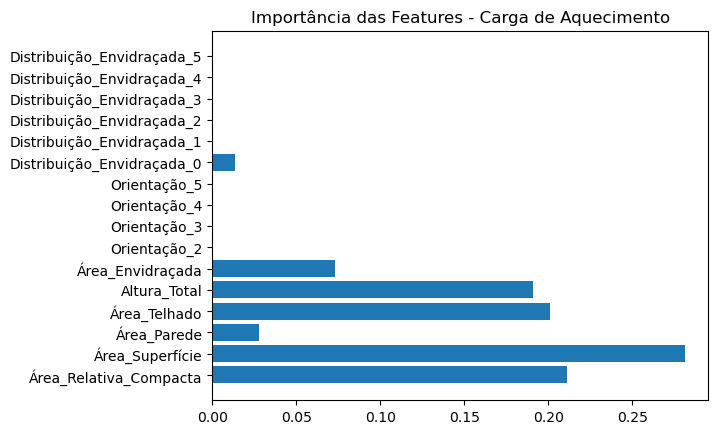

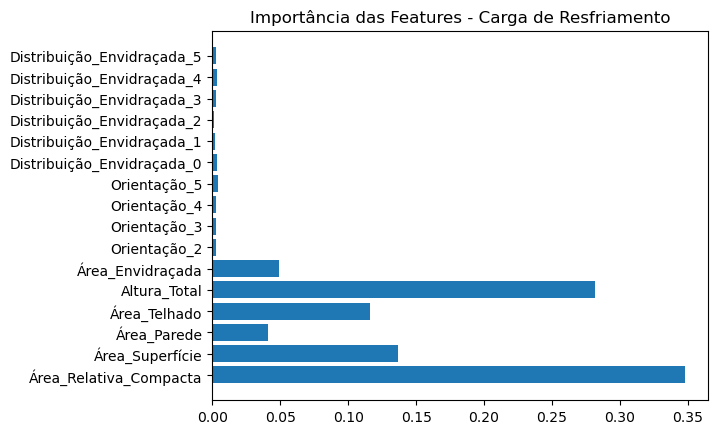

In [13]:
# Importância das features para Carga de Aquecimento
importances_aq = modelo_aq.feature_importances_
plt.barh(X.columns, importances_aq)
plt.title("Importância das Features - Carga de Aquecimento")
plt.show()

# Importância das features para Carga de Resfriamento
importances_res = modelo_res.feature_importances_
plt.barh(X.columns, importances_res)
plt.title("Importância das Features - Carga de Resfriamento")
plt.show()


# Conclusão

A utilização do Random Forest Regressor aliado à biblioteca Scikit-Learn permitiu o desenvolvimento eficiente de um modelo preditivo para a Carga de Aquecimento e Resfriamento em edificações. A combinação de um algoritmo robusto com uma biblioteca poderosa e fácil de usar facilitou todo o processo, desde o pré-processamento dos dados até a avaliação e interpretação dos resultados.